In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
dict_gender={"Male" : 1, "Female": 0}
data.replace({"gender":dict_gender},inplace=True)

data["gender"]=data["gender"].fillna(-1)

In [5]:
data["city"]=data["city"].fillna(1020)
data["dependents"]=data["dependents"].fillna(0)
data["occupation"]=data["occupation"].fillna("self_employed")
data["days_since_last_transaction"]=data["days_since_last_transaction"].fillna(999)

In [6]:
data=pd.concat([data,pd.get_dummies(data['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [7]:
num_cols = ['current_balance','previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit',
            'previous_month_debit','current_month_balance', 'previous_month_balance']

for i in num_cols:
    data[i] = np.log(data[i] + 17000)

In [8]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
scaled=std.fit_transform(data[num_cols])
scaled=pd.DataFrame(scaled,columns=num_cols)

In [9]:
df_copy=data.copy()
data=data.drop(columns=num_cols,axis=1)

In [10]:
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [11]:
y_all = data.churn
data = data.drop(['churn','customer_id','occupation'],axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data,y_all,test_size=1/3, random_state=11,stratify = y_all)

In [13]:
input_neurons=xtrain.shape[1]

In [14]:

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer

In [15]:
#Since it is Binary classification Problem number of neurons in output layer is one
number_hidden_layer=1
neurons_hidden_layer1=3
output_neurons=1

In [34]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neurons_hidden_layer1,activation='sigmoid',input_dim=23))
model.add(Dense(units=output_neurons,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [36]:
#compiling the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [37]:
model_history=model.fit(xtrain,ytrain,epochs=30,validation_split=0.2)

Epoch 1/30
473/473 [==============================] - 2s 3ms/step - loss: 0.5833 - accuracy: 0.8145 - val_loss: 0.5510 - val_accuracy: 0.8151
Epoch 2/30
473/473 [==============================] - 1s 3ms/step - loss: 0.5307 - accuracy: 0.8145 - val_loss: 0.5162 - val_accuracy: 0.8151
Epoch 3/30
473/473 [==============================] - 1s 3ms/step - loss: 0.5061 - accuracy: 0.8145 - val_loss: 0.4983 - val_accuracy: 0.8151
Epoch 4/30
473/473 [==============================] - 1s 2ms/step - loss: 0.4915 - accuracy: 0.8145 - val_loss: 0.4865 - val_accuracy: 0.8151
Epoch 5/30
473/473 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.8145 - val_loss: 0.4813 - val_accuracy: 0.8151
Epoch 6/30
473/473 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.8145 - val_loss: 0.4795 - val_accuracy: 0.8151
Epoch 7/30
473/473 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.8145 - val_loss: 0.4789 - val_accuracy: 0.8151
Epoch 

In [38]:
y_log=model.predict(xtest)

296/296 [==============================] - 0s 1ms/step


In [39]:
y_pred=np.where(y_log>0.5,1,0)


In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,y_pred)

0.8147130324490012

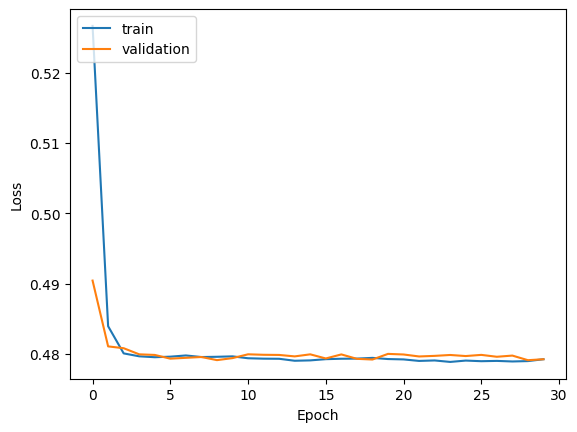

In [32]:
from matplotlib import pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()

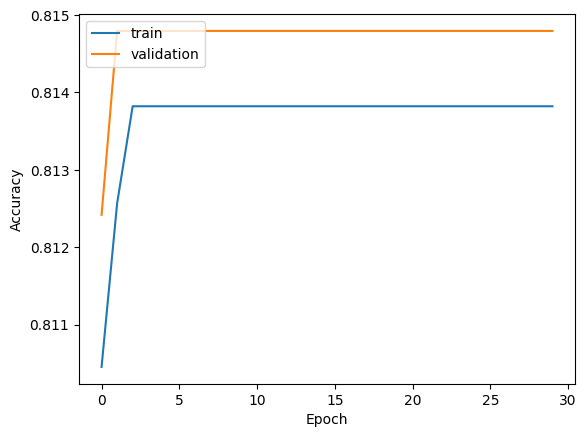

In [33]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()